In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
path = "dataset/medical_data.csv"
df = pd.read_csv(path)
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [37]:
# add overwieght column
# 0 for not overweight and 1 for overweight (bmi)
# bmi = weight[kg] / (height[m] **2 )

df["bmi_values"] = df.weight / ((df.height/100)**2)
df["overweight"] = df["bmi_values"].apply(lambda x: 1 if (x>25) else 0)

df.drop("bmi_values", axis=1, inplace=True)
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [38]:
# Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. 
# If the value is more than 1, make the value 1.

print(df.gluc.unique())
print(df.cholesterol.unique())

df.gluc = df.gluc.apply(lambda x: 0 if (x==1) else 1)
df.cholesterol = df.cholesterol.apply(lambda x: 0 if (x==1) else 1)
df.head(5)

[1 2 3]
[1 3 2]


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


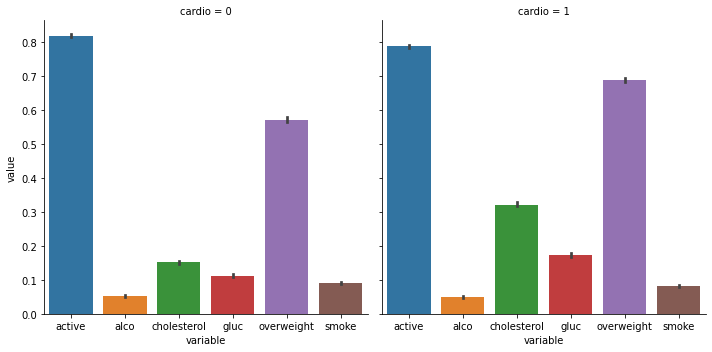

In [115]:
# Convert the data into long format 
# create a chart that shows the value counts of the categorical features using seaborn's catplot()

cols_needed = ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]

df_melted = pd.melt(df, id_vars="cardio", value_vars=cols_needed)


sns.catplot(
    data=df_melted,
    x="variable",
    y="value",
    col="cardio",
    kind="bar"
);

In [89]:
# filter out:
# 1. diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
df = df[df.ap_lo <= df.ap_hi]

# 2. height is less than the 2.5th percentile
df = df[df.height >= (df.height.quantile(0.025)) ]

# 3. height is more than the 97.5th percentile
df = df[ df.height <= (df.height.quantile(0.975)) ]

# 4. weight is less than the 2.5th percentile
df = df[df.weight >= (df.weight.quantile(0.025)) ]

# 5. weight is more than the 97.5th percentile
df = df[df.weight <= (df.weight.quantile(0.975)) ]
df.shape

(50379, 14)

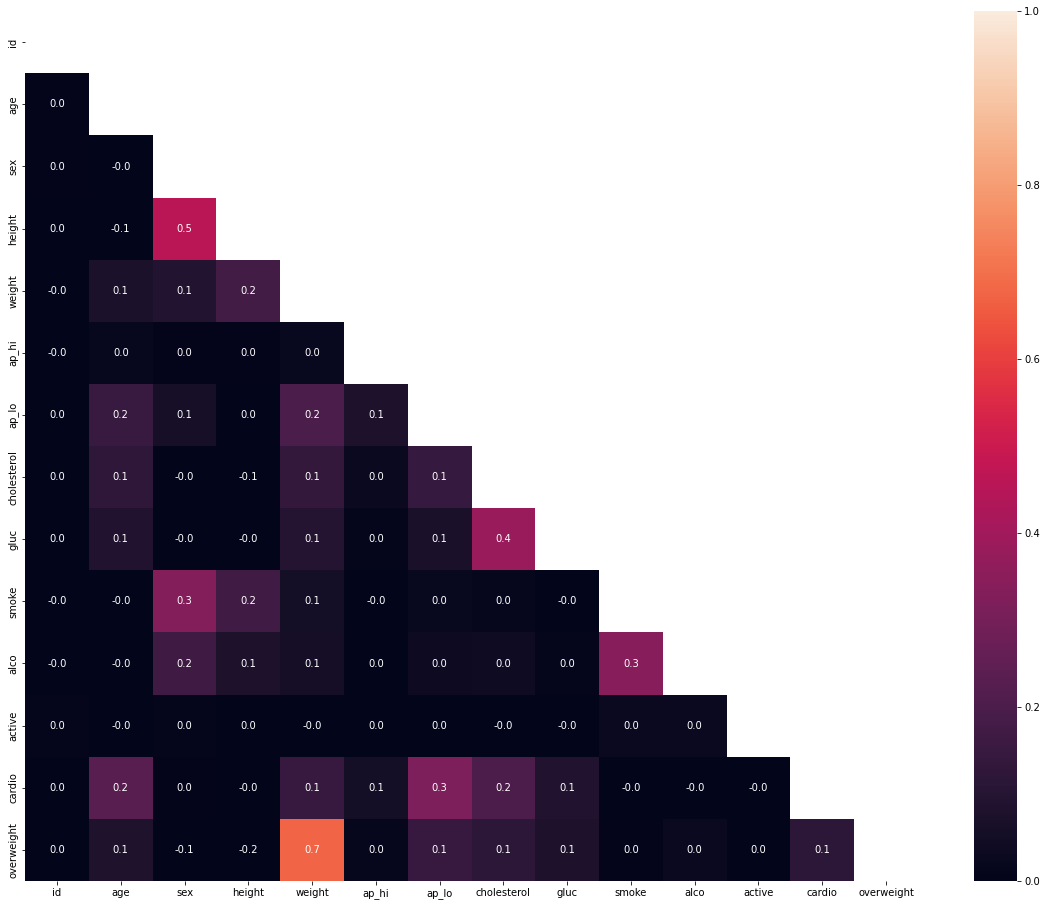

In [114]:
plt.figure(figsize=(20, 16))

sns.heatmap(df.corr(), annot=True, vmin=0, vmax=1, fmt=".1f", mask=np.triu(df.corr()));